# PyTorch Fundamentals

This notebook deals with the basic building block of machine learning and deep learning, the tensor.

| **Topic** | **Contents** |
| ----- | ----- |
| **Introduction to tensors** | Tensors are the basic building block of all of machine learning and deep learning. |
| **Creating tensors** | Tensors can represent almost any kind of data (images, words, tables of numbers). |
| **Getting information from tensors** | If you can put information into a tensor, you'll want to get it out too. |
| **Manipulating tensors** | Machine learning algorithms (like neural networks) involve manipulating tensors in many different ways such as adding, multiplying, combining. |
| **Dealing with tensor shapes** | One of the most common issues in machine learning is dealing with shape mismatches (trying to mix wrong shaped tensors with other tensors). |
| **Indexing on tensors** | If you've indexed on a Python list or NumPy array, it's very similar with tensors, except they can have far more dimensions. |
| **Mixing PyTorch tensors and NumPy** | PyTorch plays with tensors ([`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html)), NumPy likes arrays ([`np.ndarray`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)) sometimes you'll want to mix and match these. |
| **Reproducibility** | Machine learning is very experimental and since it uses a lot of *randomness* to work, sometimes you'll want that *randomness* to not be so random. |
| **Running tensors on GPU** | GPUs (Graphics Processing Units) make your code faster, PyTorch makes it easy to run your code on GPUs. |

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.8.0+cu126


# Introduction to Tensors

Tensors are the fundamental building block of machine learning.
**They are numerical representations (encodings) of data.**


For example, you could represent an image as a tensor with shape `[3, 224, 224]` which would mean `[colour_channels, height, width]`, as in the image has `3` colour channels (red, green, blue), a height of `224` pixels and a width of `224` pixels.

![example of going from an input image to a tensor representation of the image, image gets broken down into 3 colour channels as well as numbers to represent the height and width](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-tensor-shape-example-of-image.png)




## Creating Tensors
PyTorch tensors are created using `torch.Tensor()`


[read through the documentation on `torch.Tensor`](https://pytorch.org/docs/stable/tensors.html)

In [2]:
# scalar - a single number and in tensor-speak it's a zero dimension tensor
# torch.tensor is a pytorch tensor datatype

scalar = torch.tensor(7)
print(scalar)

tensor(7)


In [3]:
# check the dimensions of a tensor - ndim
scalar.ndim

# a scalar has no dimensions (single number)

0

A vector is a single dimension tensor (1D)

As in, you could have a vector `[3, 2]` to describe `[bedrooms, bathrooms]` in your house. Or you could have `[3, 2, 2]` to describe `[bedrooms, bathrooms, car_parks]` in your house.

In [4]:
# Vector - 1D tensor
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [5]:
vector.ndim

1

You can tell the number of dimensions a tensor in PyTorch has by the number of square brackets on the outside (`[`) and you only need to count one side.

Another important concept for tensors is their `shape` attribute. The shape tells you how the elements inside them are arranged.

In [6]:
vector.shape

torch.Size([2])

The above returns `torch.Size([2])` which means our vector has a shape of `[2]`. This is because of the two elements we placed inside the square brackets (`[7, 7]`).

In [7]:
# Matrix - 2D tensor
MATRIX = torch.tensor([
    [7,8],
     [9,10]
    ])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [8]:
MATRIX.ndim

2

In [9]:
MATRIX.shape
# 2 elements each in each dimension

torch.Size([2, 2])

In [10]:
MATRIX[0] # access elements in 1st dimension

tensor([7, 8])

In [11]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [12]:
TENSOR.ndim

3

In [13]:
TENSOR.shape

torch.Size([1, 3, 3])

it outputs `torch.Size([1, 3, 3])`.

The dimensions go outer to inner.

That means there's 1 dimension of 3 by 3.

![example of different tensor dimensions](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-pytorch-different-tensor-dimensions.png)

> Note: the names martrix and tensor used interchangably. This is common. Since in PyTorch you're often dealing with `torch.Tensor`s (hence the tensor name), however, the shape and dimensions of what's inside will dictate what it actually is.

Summary

| Name | What is it? | Number of dimensions |
| ----- | ----- | ----- |
| **scalar** | a single number | 0 |
| **vector** | a number with direction (e.g. wind speed with direction) but can also have many other numbers | 1 |
| **matrix** | a 2-dimensional array of numbers | 2 |
| **tensor** | an n-dimensional array of numbers | can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector |

![scalar vector matrix tensor and what they look like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-scalar-vector-matrix-tensor.png)

## Random Tensors

**Why random tensors?**
Random tensors are important because the way neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data



Machine learning models such as neural networks manipulate and seek patterns within tensors. A machine learning model often starts out with large random tensors of numbers and adjusts these random numbers as it works through data to better represent it.

In essence:

`Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers...`

As a data scientist, you can define how the machine learning model starts (initialization), looks at data (representation) and updates (optimization) its random numbers.






In [14]:
# Create a random tensor of size (3, 4) - torch.rand(size)

random_tensor = torch.rand(size=(3,4))
random_tensor

tensor([[0.0282, 0.7600, 0.5963, 0.2550],
        [0.4615, 0.3836, 0.6543, 0.4122],
        [0.6881, 0.1613, 0.9228, 0.3272]])

In [15]:
random_tensor.ndim

2

In [16]:
random_tensor.shape

torch.Size([3, 4])

## Zeroes and Ones

Sometimes you'll just want to fill tensors with zeros or ones.

This happens a lot with masking (like masking some of the values in one tensor with zeros to let a model know not to learn them).

In [17]:
# Create a tensor of all zeros - torch.zeros(size)
zeros = torch.zeros(size=(3 ,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [18]:
# Create a tensor of all ones - torch.ones()
ones = torch.ones(size=(3 ,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [19]:
ones.dtype

# dtype --> Find datatype
# float32 is the default datatype of pytorch tensors

torch.float32

## Creating a range of tensors and tensors-like

Sometimes you might want a range of numbers, such as 1 to 10 or 0 to 100.

You can use `torch.arange(start, end, step)` to do so.

Where:
* `start` = start of range (e.g. 0)
* `end` = end of range (e.g. 10)
* `step` = how many steps in between each value (e.g. 1)

> **Note:** In Python, you can use `range()` to create a range. However in PyTorch, `torch.range()` is deprecated and may show an error in the future.


In [20]:
## Create a range of tensor (random)
tensor_random = torch.arange(start=0, end=20, step=2)
tensor_random

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

Sometimes you might want one tensor of a certain type with the same shape as another tensor.

For example, a tensor of all zeros with the same shape as a previous tensor.

To do so you can use [`torch.zeros_like(input)`](https://pytorch.org/docs/stable/generated/torch.zeros_like.html) or [`torch.ones_like(input)`](https://pytorch.org/docs/1.9.1/generated/torch.ones_like.html) which return a tensor filled with zeros or ones in the same shape as the `input` respectively.

In [21]:
## Create a tensor like (create a tensor similar in shape of another tensor)
tensor_zeroes = torch.zeros_like(input=tensor_random)
tensor_zeroes

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Tensor Datatypes

**Note:** Tensor datatypes is one of the 3 big errors you'll run into with Pytorch and Deep Learning:
1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device

**3 imp parameters to create tensors:**
1) dtype
2) device
3) requires_grad


There are many different [tensor datatypes available in PyTorch](https://pytorch.org/docs/stable/tensors.html#data-types).

Some are specific for CPU and some are better for GPU.

Generally if you see `torch.cuda` anywhere, the tensor is being used for GPU (since Nvidia GPUs use a computing toolkit called CUDA).

In [22]:
float_tensor = torch.tensor([3.0, 6.0, 7.0],
                            dtype=None, # what datatype is the tensor (e.g. float32 or float16). Default datatype in pytorch is float32
                            device=None, # what device is your tensor on. by default, device="cpu". For gpu, use device="cuda"
                            requires_grad=False # whether or not to track gradients with this tensor operations
                            )
print(float_tensor)
print(float_tensor.dtype)

tensor([3., 6., 7.])
torch.float32


Aside from shape issues (tensor shapes don't match up), two of the other most common issues you'll come across in PyTorch are datatype and device issues.

For example, one of tensors is `torch.float32` and the other is `torch.float16` (PyTorch often likes tensors to be the same format).

In [23]:
# Convert/change datatype of tensor using .type()
float_16_tensor = float_tensor.type(torch.float16) # change from 32-bit to 16-bit tensor here
float_16_tensor

tensor([3., 6., 7.], dtype=torch.float16)

# Getting information from tensors (tensor attributes)

Once you've created tensors, you might want to get some information from them.

Three of the most common attributes you'll want to find out about tensors are:
* `shape` - what shape is the tensor? (some operations require specific shape rules)
* `dtype` - what datatype are the elements within the tensor stored in?
* `device` - what device is the tensor stored on? (usually GPU or CPU)

> **Note:** When you run into issues in PyTorch, it's very often one to do with one of the three attributes below.

In [24]:
some_tensor = torch.rand(3,4)
some_tensor

tensor([[0.4310, 0.6218, 0.6958, 0.7125],
        [0.8786, 0.2250, 0.6819, 0.4668],
        [0.9803, 0.5521, 0.3625, 0.1674]])

In [25]:
# Find out some details about the tensor
print(some_tensor)
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device tensor is on: {some_tensor.device}")

tensor([[0.4310, 0.6218, 0.6958, 0.7125],
        [0.8786, 0.2250, 0.6819, 0.4668],
        [0.9803, 0.5521, 0.3625, 0.1674]])
Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device tensor is on: cpu


# Manipulating Tensors (tensor operations)

In deep learning, data (images, text, video, audio, protein structures, etc) gets represented as tensors.

A model learns by investigating those tensors and performing a series of operations on tensors to create a representation of the patterns in the input data.

Tensor operations include:
1. Addition
2. Subtraction
3. Multiplication (element-wise)
4. Division
5. Matrix Multiplication

### Basic Operations

In [26]:
tensor = torch.tensor([1, 2, 3])
tensor

tensor([1, 2, 3])

In [27]:
tensor = tensor + 10 # add
print(tensor)
tensor = tensor * 2 # multiplication (element-wise)
print(tensor)
tensor = tensor - 5 # subtract
print(tensor)

tensor([11, 12, 13])
tensor([22, 24, 26])
tensor([17, 19, 21])


### Matrix Multiplication

Two main ways of performing multiplication in neural networks and deep learning:

1. Element-wise multiplication
2. Matrix multiplication (dot product)

There are two main rules that performing matrix multiplication needs to satisfy:

1. The inner dimensions must match:

* `(3,2)` x `(3,2)` won't work
* `(3, 2)` x `(2, 3)` will work
* `(2, 3)` x `(3, 2)` will work

2. The resulting matrix has the shape of the outer dimensions:

* `(2, 3)` x `(3,2)` --> `(2,2)` matrix
* `(3, 2)` x `(2, 3)` --> `(3,3)` matrix

> **Note:** A matrix multiplication like this is also referred to as the [**dot product**](https://www.mathsisfun.com/algebra/vectors-dot-product.html) of two matrices.

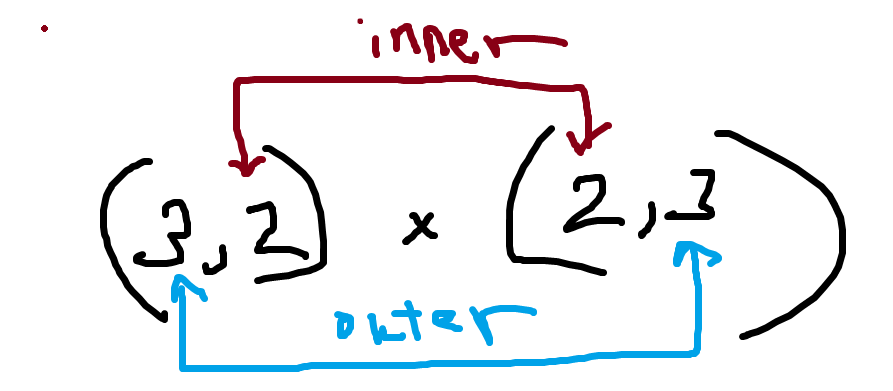

In [28]:
# Element wise multiplication
tensor * tensor

tensor([289, 361, 441])

In [29]:
# Matrix multiplication --> torch.matmul() or torch.mm() [Alias]
torch.matmul(tensor, tensor)

tensor(1091)

The difference between element-wise multiplication and matrix multiplication is the addition of values.

For our `tensor` variable with values `[1, 2, 3]`:

| Operation | Calculation | Code |
| ----- | ----- | ----- |
| **Element-wise multiplication** | `[1*1, 2*2, 3*3]` = `[1, 4, 9]` | `tensor * tensor` |
| **Matrix multiplication** | `[1*1 + 2*2 + 3*3]` = `[14]` | `tensor.matmul(tensor)` |


In [30]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 33 µs, sys: 5 µs, total: 38 µs
Wall time: 41.7 µs


tensor(1091)

## One of the most common errors in deep learning: shape errors

Because much of deep learning is multiplying and performing operations on matrices and matrices have a strict rule about what shapes and sizes can be combined, one of the most common errors you'll run into in deep learning is shape mismatches.

In [31]:
# Shapes need to be in the right way
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (this will error)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [32]:
print(tensor_A.shape, tensor_B.shape)

torch.Size([3, 2]) torch.Size([3, 2])


To fix our tensor shape issues, we can manipulate the shape of one of our tensors using a **transpose**

A **transpose** switches the axis or dimensions of a given tensor

In [33]:
tensor_B, tensor_B.shape

(tensor([[ 7., 10.],
         [ 8., 11.],
         [ 9., 12.]]),
 torch.Size([3, 2]))

You can perform transposes in PyTorch using either:
* `torch.transpose(input, dim0, dim1)` - where `input` is the desired tensor to transpose and `dim0` and `dim1` are the dimensions to be swapped.
* `tensor.T` - where `tensor` is the desired tensor to transpose.

In [34]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7.,  8.,  9.],
         [10., 11., 12.]]),
 torch.Size([2, 3]))

In [35]:
# The matrix multiplication works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


### Finding the min, max, mean, sum, etc (tensor aggregation)

In [36]:
# Create a tensor
x = torch.arange(0, 100, 10)
x, x.dtype

(tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]), torch.int64)

In [37]:
# Find the min
torch.min(x), x.min()

(tensor(0), tensor(0))

In [38]:
# Find the max
torch.max(x), x.max()

(tensor(90), tensor(90))

In [39]:
# Find the sum
torch.sum(x), x.sum()

(tensor(450), tensor(450))

In [40]:
# Find the mean
# Note: torch.mean() function requires a tensor of float32 datatype to work
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

### Change tensor datatype

a common issue with deep learning operations is having your tensors in different datatypes.

If one tensor is in `torch.float64` and another is in `torch.float32`, you might run into some errors.

We can change the datatypes of tensors using [`torch.Tensor.type(dtype=None)`](https://pytorch.org/docs/stable/generated/torch.Tensor.type.html) where the `dtype` parameter is the datatype you'd like to use.


In [41]:
# Create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

In [42]:
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

In [43]:
# Create an int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

> **Note:** Different datatypes can be confusing to begin with. But think of it like this, the lower the number (e.g. 32, 16, 8), the less precise a computer stores the value. And with a lower amount of storage, this generally results in faster computation and a smaller overall model. Mobile-based neural networks often operate with 8-bit integers, smaller and faster to run but less accurate than their float32 counterparts.

### Reshaping, stacking, squeezing and unsqueezing tensors

* **Reshaping** - reshapes an input tensor to a defined shape
* View - return a view of an input tensor of certain shape but keep the same memory as the original tensor
* **Stacking** - combine multiple tensors, on top of each other (vstack) or side by side (hstack)
* Squeeze - remove all `1` dimensions from a tensor
* Unsqueeze - add a `1` dimension to a target tensor
* Permute - return a view of the input with dimensions permuted (swapped) in a certain way

Often times you'll want to *reshape or change the dimensions of your tensors* **without actually changing the values** inside them.

To do so, some popular methods are:

| Method | One-line description |
| ----- | ----- |
| [`torch.reshape(input, shape)`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape) | Reshapes `input` to `shape` (if compatible), can also use `torch.Tensor.reshape()`. |
| [`Tensor.view(shape)`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) | Returns a view of the original tensor in a different `shape` but shares the same data as the original tensor. |
| [`torch.stack(tensors, dim=0)`](https://pytorch.org/docs/1.9.1/generated/torch.stack.html) | Concatenates a sequence of `tensors` along a new dimension (`dim`), all `tensors` must be same size. |
| [`torch.squeeze(input)`](https://pytorch.org/docs/stable/generated/torch.squeeze.html) | Squeezes `input` to remove all the dimenions with value `1`. |
| [`torch.unsqueeze(input, dim)`](https://pytorch.org/docs/1.9.1/generated/torch.unsqueeze.html) | Returns `input` with a dimension value of `1` added at `dim`. |
| [`torch.permute(input, dims)`](https://pytorch.org/docs/stable/generated/torch.permute.html) | Returns a *view* of the original `input` with its dimensions permuted (rearranged) to `dims`. |

Why do any of these?

Because deep learning models (neural networks) are all about manipulating tensors in some way. And because of the rules of matrix multiplication, if you've got shape mismatches, you'll run into errors. These methods help you make sure the right elements of your tensors are mixing with the right elements of other tensors.


In [44]:
# Lets create a tensor
import torch
x = torch.arange(1.0, 10.0)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [45]:
# input size = 9

# Add an extra dimension
x_reshaped = x.reshape(9, 1) # 9 x 1 = 9 elements, so re-shaping will work as it matches input size
x_reshaped, x_reshaped.shape

# reshaped tensor from 1D --> 2D

(tensor([[1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 torch.Size([9, 1]))

In [46]:
# Stack tensors on top of each other

x_stacked_vertical = torch.stack([x, x, x, x], dim=0) # vertical stack
x_stacked_vertical, x_stacked_vertical.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.],
         [1., 2., 3., 4., 5., 6., 7., 8., 9.],
         [1., 2., 3., 4., 5., 6., 7., 8., 9.],
         [1., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 torch.Size([4, 9]))

In [47]:
x_stacked_horizontal = torch.stack([x, x, x, x], dim=1) # horizontal stack
x_stacked_horizontal, x_stacked_horizontal.shape

(tensor([[1., 1., 1., 1.],
         [2., 2., 2., 2.],
         [3., 3., 3., 3.],
         [4., 4., 4., 4.],
         [5., 5., 5., 5.],
         [6., 6., 6., 6.],
         [7., 7., 7., 7.],
         [8., 8., 8., 8.],
         [9., 9., 9., 9.]]),
 torch.Size([9, 4]))

In [48]:
# torch.squeeze() -- removes all single dimensions from a target tensor

x_reshaped = x.reshape(1, 9)

print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])

New tensor: tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape: torch.Size([9])


In [49]:
## torch.unsqueeze() - Add a single dimension to a target tensor at a specific dim

x_unsqueezed = x_squeezed.unsqueeze(dim=0) # vertical addition
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

x_unsqueezed2 = x_squeezed.unsqueeze(dim=1) # horizontal dimension
print(f"\nNew tensor: {x_unsqueezed2}")
print(f"New shape: {x_unsqueezed2.shape}")


New tensor: tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]])
New shape: torch.Size([1, 9])

New tensor: tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])
New shape: torch.Size([9, 1])


In [50]:
# torch.permute() - re-arranges the dimensions of a target tensor in a specified order
x_original = torch.rand(size=(224, 224, 3)) # [height, width, color_channels]

# Permute the original tensor to rearrange the axis (or dim) order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}") # [color_channels, height, width]

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


> **Note**: Because permuting returns a *view* (shares the same data as the original), the values in the permuted tensor will be the same as the original tensor and if you change the values in the view, it will change the values of the original.

## Indexing (selecting data from tensors)

Indexing with Pytorch with similar to indexing with Numpy

In [51]:
# Create a tensor
import torch
x = torch.arange(1, 10).reshape(1, 3, 3) # 9 elements -- so 1x3x3 = 9, reshaping will work
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [52]:
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Indexing values goes outer dimension -> inner dimension (check out the square brackets).

In [53]:
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


In [54]:
# use ":" to select all of a target dimension

# Get all values of 0th and 1st dimension but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [55]:
# Get index 0 of 0th dimension and 1st dimension and all values of 2nd dimension
x[0, 0, :]

tensor([1, 2, 3])

## PyTorch tensors & NumPy

Numpy is a scientific Python numerical computing library, and Pytorch can interact with it

* Numpy data to Pytorch tensor --> `torch.from_numpy(ndarray)`
* Pytorch tensor to Numpy data --> `tensor.numpy()`

In [56]:
# Numpy array to tensor
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

# Note:
# 1) when converting numpy --> pytorch, pytorch reflects numpy's default datatype of float64 unless specified otherwise
# 2) pytorch default datatype is float32

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [57]:
# Tensor to Numpy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor, numpy_tensor.dtype

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 dtype('float32'))

## Reproducibility (trying to take the random out of random)

For deep learning experiments, to reduce the randomness in neural networks, Pytorch brings the concept of **random seed**

In [58]:
import torch

# Create 2 random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.6813, 0.2929, 0.0216, 0.0176],
        [0.8069, 0.3560, 0.2092, 0.9883],
        [0.9991, 0.8173, 0.1836, 0.5413]])
tensor([[0.6350, 0.9935, 0.4471, 0.8088],
        [0.2625, 0.2306, 0.1373, 0.8340],
        [0.0133, 0.0401, 0.2828, 0.2884]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


[`torch.manual_seed(seed)`](https://pytorch.org/docs/stable/generated/torch.manual_seed.html) comes in, where `seed` is an integer (like `42` but it could be anything) that flavours the randomness.

In [59]:
# Lets make random but reproducible tensors

# Set the random seed
RANDOM_SEED = 42 # flavor of randomness

# execute torch.manual_seed() before calling the rand method as it works for only 1 block of code (next block)
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3, 4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

# getting same numerical output in both tensors

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


> **Resource:** For more, on reproducibility in general and random seeds, checkout:
> * [The PyTorch reproducibility documentation](https://pytorch.org/docs/stable/notes/randomness.html).
> * [The Wikipedia random seed page](https://en.wikipedia.org/wiki/Random_seed) (a good overview of random seeds and pseudorandomness in general).

## Running tensors on GPUs (and making faster computations)

GPUs = faster computation on numbers, thanks to CUDA + NVIDIA hardware + PyTorch working behind the scenes

Deep learning algorithms require a lot of numerical operations.

And by default these operations are often done on a CPU (computer processing unit).

However, there's another common piece of hardware called a GPU (graphics processing unit), which is often much faster at performing the specific types of operations neural networks need (matrix multiplications) than CPUs.

In [60]:
# Find the GPU being used, and version
!nvidia-smi

Tue Oct  7 16:50:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Check for GPU access with Pytorch

In [62]:
# Check for Gpu access with Pytorch
import torch
torch.cuda.is_available()

True

### Device-agnostic code (GPU, CPU)

For Pytorch since its capable of running compute on the GPU or CPU, it's best practice to setup device agnostic code

i.e.. run on GPU if available, else default to CPU

In [63]:
# Setup device agnostic code - use gpu if available, otherwise cpu
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

If the above output `"cuda"` it means we can set all of our PyTorch code to use the available CUDA device (a GPU) and if it output `"cpu"`, our PyTorch code will stick with the CPU.

> **Note:** In PyTorch, it's best practice to write [**device agnostic code**](https://pytorch.org/docs/master/notes/cuda.html#device-agnostic-code). This means code that'll run on CPU (always available) or GPU (if available).


In [64]:
# Count number of devices
torch.cuda.device_count()

1

Knowing the number of GPUs PyTorch has access to is helpful incase you wanted to run a specific process on one GPU and another process on another (PyTorch also has features to let you run a process across *all* GPUs).

### Putting tensors (and models) on GPU

The reason we want our tensors/models on the GPU is because using a GPU results in faster computations

GPUs offer far faster numerical computing than CPUs do and if a GPU isn't available, because of our **device agnostic code** (see above), it'll run on the CPU.

> **Note:** Putting a tensor on GPU using `to(device)` (e.g. `some_tensor.to(device)`) returns a copy of that tensor, e.g. the same tensor will be on CPU and GPU. To overwrite tensors, reassign them:
>
> `some_tensor = some_tensor.to(device)`

In [65]:
# Create a tensor (default on the CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [66]:
# Move tensor to GPU if available
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

If you have a GPU available, the above code will output something like:

```
tensor([1, 2, 3]) cpu
tensor([1, 2, 3], device='cuda:0')
```

Notice the second tensor has `device='cuda:0'`, this means it's stored on the 0th GPU available (GPUs are 0 indexed, if two GPUs were available, they'd be `'cuda:0'` and `'cuda:1'` respectively, up to `'cuda:n'`).



### Moving tensors back to the CPU

In [67]:
# If tensor is on GPU, can't transform it to Numpy (numpy only on CPU)

# To fix the GPU tensor with Numpy issue, first set it to CPU
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])